In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
input_size = 784 # 28x28
hidden_size_1 = 500 
hidden_size_2 =250
hidden_size_3 = 100
num_classes = 10
num_epochs = 15
batch_size = 64
learning_rate = 0.01

In [4]:
# Import MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='./data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='./data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [5]:
# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)


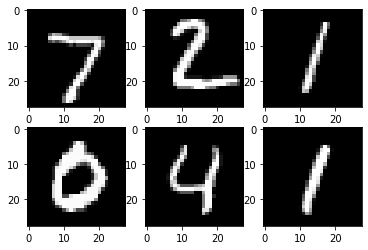

In [6]:
examples = iter(test_loader)
example_data, example_targets = examples.next()

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(example_data[i][0], cmap='gray')
plt.show()

In [7]:
# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size_1,hidden_size_2,hidden_size_3, num_classes):
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.l1 = nn.Linear(input_size, hidden_size_1) 
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size_1, hidden_size_2)

        self.l3 = nn.Linear(hidden_size_2, hidden_size_3)
        
        self.l4 = nn.Linear(hidden_size_3, num_classes)
        self.softmax = nn.LogSoftmax(dim = 1) 
    
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        out = self.relu(out)
        out = self.l3(out)
        out = self.relu(out)
        out = self.l4(out)
        out = self.softmax(out)
        
        return out


model = NeuralNet(input_size, hidden_size_1,hidden_size_2,hidden_size_3, num_classes).to(device)

In [8]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [9]:
# Train the model
loss_log = []
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # origin shape: [100, 1, 28, 28]
        # resized: [100, 784]
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')
            loss_log.append(loss.item())

Epoch [1/15], Step [100/938], Loss: 0.3399
Epoch [1/15], Step [200/938], Loss: 0.2616
Epoch [1/15], Step [300/938], Loss: 0.6776
Epoch [1/15], Step [400/938], Loss: 0.1354
Epoch [1/15], Step [500/938], Loss: 0.6523
Epoch [1/15], Step [600/938], Loss: 0.2129
Epoch [1/15], Step [700/938], Loss: 0.2891
Epoch [1/15], Step [800/938], Loss: 0.4341
Epoch [1/15], Step [900/938], Loss: 0.0718
Epoch [2/15], Step [100/938], Loss: 0.1373
Epoch [2/15], Step [200/938], Loss: 0.2780
Epoch [2/15], Step [300/938], Loss: 0.2881
Epoch [2/15], Step [400/938], Loss: 0.1531
Epoch [2/15], Step [500/938], Loss: 0.2948
Epoch [2/15], Step [600/938], Loss: 0.2785
Epoch [2/15], Step [700/938], Loss: 0.2342
Epoch [2/15], Step [800/938], Loss: 0.0962
Epoch [2/15], Step [900/938], Loss: 0.0551
Epoch [3/15], Step [100/938], Loss: 0.0766
Epoch [3/15], Step [200/938], Loss: 0.0901
Epoch [3/15], Step [300/938], Loss: 0.0584
Epoch [3/15], Step [400/938], Loss: 0.1338
Epoch [3/15], Step [500/938], Loss: 0.1532
Epoch [3/15

In [10]:
# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs.data, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the 10000 test images: {acc} %')

Accuracy of the network on the 10000 test images: 97.09 %


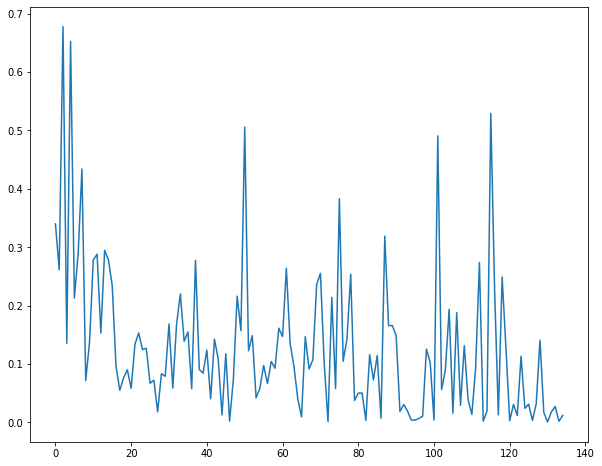

In [11]:
plt.figure(figsize=(10,8))
plt.plot(loss_log)